<a href="https://colab.research.google.com/github/DanB1421/DATA606/blob/main/VaxBots_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
patient_data_2023 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2023VAERSData/2023VAERSDATA.csv', encoding='latin-1')
patient_data_2023 = patient_data_2023.drop(columns=['RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
                                          'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY',
                                          'V_FUNDBY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'OFC_VISIT','ER_ED_VISIT'])
patient_data_2023.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES
0,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,diabetic,NaN,NaN,none
1,2547731,6.0,M,Error: Incorrect Reconstitution-,U,0.0,NaN,NaN,NaN,NaN,NaN
2,2547732,38.0,F,Error: Patient Accidentally Stuck by Needle-,Y,0.0,NaN,NaN,NaN,NaN,NaN
3,2547733,63.0,M,Error: Dose in Series Given Too Early-,U,0.0,NaN,NaN,NaN,NaN,NaN
4,2547734,30.0,F,Systemic: EYE TWITCHING-Medium,N,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
patient_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106089 entries, 0 to 106088
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      106089 non-null  int64  
 1   AGE_YRS       87758 non-null   float64
 2   SEX           106089 non-null  object 
 3   SYMPTOM_TEXT  105588 non-null  object 
 4   RECOVD        86301 non-null   object 
 5   NUMDAYS       85053 non-null   float64
 6   OTHER_MEDS    34183 non-null   object 
 7   CUR_ILL       20636 non-null   object 
 8   HISTORY       36706 non-null   object 
 9   BIRTH_DEFECT  45 non-null      object 
 10  ALLERGIES     29386 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 8.9+ MB


In [ ]:
symptom_data_2023 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2023VAERSData/2023VAERSSYMPTOMS.csv', encoding='latin-1')
symptom_data_2023 = symptom_data_2023.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])
symptom_data_2023.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,2547730,Blood pressure orthostatic abnormal,COVID-19,Coma,Computerised tomogram,Exposure to SARS-CoV-2
1,2547730,Head injury,Headache,Laboratory test,Magnetic resonance imaging,SARS-CoV-2 antibody test negative
2,2547730,SARS-CoV-2 test positive,Unresponsive to stimuli,X-ray,NaN,NaN
3,2547731,Product preparation issue,NaN,NaN,NaN,NaN
4,2547732,Injury associated with device,NaN,NaN,NaN,NaN


In [ ]:
symptom_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136730 entries, 0 to 136729
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  136730 non-null  int64 
 1   SYMPTOM1  136730 non-null  object
 2   SYMPTOM2  96016 non-null   object
 3   SYMPTOM3  66501 non-null   object
 4   SYMPTOM4  47738 non-null   object
 5   SYMPTOM5  37707 non-null   object
dtypes: int64(1), object(5)
memory usage: 6.3+ MB


In [ ]:
vax_data_2023 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2023VAERSData/2023VAERSVAX.csv', encoding = 'latin-1')
vax_data_2023 = vax_data_2023.drop(columns=['VAX_LOT', 'VAX_SITE', 'VAX_NAME'])
vax_data_2023.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,2547730,COVID19,JANSSEN,UNK,SYR
1,2547731,COVID19,PFIZER\BIONTECH,3,IM
2,2547732,COVID19-2,MODERNA,4,IM
3,2547733,COVID19,MODERNA,1,IM
4,2547734,TDAP,GLAXOSMITHKLINE BIOLOGICALS,1,IM


In [ ]:
vax_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128256 entries, 0 to 128255
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         128256 non-null  int64 
 1   VAX_TYPE         128256 non-null  object
 2   VAX_MANU         128256 non-null  object
 3   VAX_DOSE_SERIES  125174 non-null  object
 4   VAX_ROUTE        87623 non-null   object
dtypes: int64(1), object(4)
memory usage: 4.9+ MB


In [ ]:
n = 10
vax_data_2023['VAX_TYPE'].value_counts()[:n].index.tolist()

['COVID19',
 'COVID19-2',
 'VARZOS',
 'FLU4',
 'RSV',
 'UNK',
 'HPV9',
 'TDAP',
 'HEPA',
 'HEP']

In [ ]:
vax_data_2023[vax_data_2023.VAX_TYPE == 'UNK'].shape[0]

2875

In [ ]:
mask = vax_data_2023['VAX_TYPE'] == 'UNK'
vax_data_2023 = vax_data_2023[~mask]

In [ ]:
vax_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125381 entries, 0 to 128255
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         125381 non-null  int64 
 1   VAX_TYPE         125381 non-null  object
 2   VAX_MANU         125381 non-null  object
 3   VAX_DOSE_SERIES  122391 non-null  object
 4   VAX_ROUTE        86184 non-null   object
dtypes: int64(1), object(4)
memory usage: 5.7+ MB


In [ ]:
master_data_2023 = pd.merge(patient_data_2023, symptom_data_2023, how='inner', on='VAERS_ID')
master_data_2023.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,diabetic,NaN,NaN,none,Blood pressure orthostatic abnormal,COVID-19,Coma,Computerised tomogram,Exposure to SARS-CoV-2
1,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,diabetic,NaN,NaN,none,Head injury,Headache,Laboratory test,Magnetic resonance imaging,SARS-CoV-2 antibody test negative
2,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,diabetic,NaN,NaN,none,SARS-CoV-2 test positive,Unresponsive to stimuli,X-ray,NaN,NaN
3,2547731,6.0,M,Error: Incorrect Reconstitution-,U,0.0,NaN,NaN,NaN,NaN,NaN,Product preparation issue,NaN,NaN,NaN,NaN
4,2547732,38.0,F,Error: Patient Accidentally Stuck by Needle-,Y,0.0,NaN,NaN,NaN,NaN,NaN,Injury associated with device,NaN,NaN,NaN,NaN


In [ ]:
master_data_2023 = pd.merge(master_data_2023, vax_data_2023, how='inner', on='VAERS_ID')
master_data_2023.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,diabetic,NaN,NaN,none,Blood pressure orthostatic abnormal,COVID-19,Coma,Computerised tomogram,Exposure to SARS-CoV-2,COVID19,JANSSEN,UNK,SYR
1,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,diabetic,NaN,NaN,none,Head injury,Headache,Laboratory test,Magnetic resonance imaging,SARS-CoV-2 antibody test negative,COVID19,JANSSEN,UNK,SYR
2,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,diabetic,NaN,NaN,none,SARS-CoV-2 test positive,Unresponsive to stimuli,X-ray,NaN,NaN,COVID19,JANSSEN,UNK,SYR
3,2547731,6.0,M,Error: Incorrect Reconstitution-,U,0.0,NaN,NaN,NaN,NaN,NaN,Product preparation issue,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,3,IM
4,2547732,38.0,F,Error: Patient Accidentally Stuck by Needle-,Y,0.0,NaN,NaN,NaN,NaN,NaN,Injury associated with device,NaN,NaN,NaN,NaN,COVID19-2,MODERNA,4,IM


In [ ]:
master_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163194 entries, 0 to 163193
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         163194 non-null  int64  
 1   AGE_YRS          140639 non-null  float64
 2   SEX              163194 non-null  object 
 3   SYMPTOM_TEXT     162533 non-null  object 
 4   RECOVD           135072 non-null  object 
 5   NUMDAYS          135827 non-null  float64
 6   OTHER_MEDS       65451 non-null   object 
 7   CUR_ILL          38754 non-null   object 
 8   HISTORY          69658 non-null   object 
 9   BIRTH_DEFECT     142 non-null     object 
 10  ALLERGIES        56651 non-null   object 
 11  SYMPTOM1         163194 non-null  object 
 12  SYMPTOM2         117592 non-null  object 
 13  SYMPTOM3         81849 non-null   object 
 14  SYMPTOM4         58912 non-null   object 
 15  SYMPTOM5         46436 non-null   object 
 16  VAX_TYPE         163194 non-null  obje

In [ ]:
patient_data_2022 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2022VAERSData/2022VAERSDATA.csv', encoding='latin-1')
patient_data_2022 = patient_data_2022.drop(columns=['RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
                                          'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY',
                                          'V_FUNDBY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'OFC_VISIT','ER_ED_VISIT'])
patient_data_2022.head()

<ipython-input-17-ab5bb3ee7d9c>:1: DtypeWarning: Columns (7,12,23) have mixed types. Specify dtype option on import or set low_memory=False.
  patient_data_2022 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2022VAERSData/2022VAERSDATA.csv', encoding='latin-1')


,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES
0,1996873,NaN,U,This spontaneous report was received from a ph...,U,0.0,NaN,NaN,NaN,NaN,NaN
1,1996874,NaN,U,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN,NaN
2,1996875,NaN,M,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN,NaN
3,1996876,34.0,F,Irregular menstrual cycle.; period extremely h...,N,16.0,ZOLOFT; ORTHO-TRI-CYCLEN LO,NaN,Comments: List of non-encoded Patient Relevant...,NaN,NaN
4,1996877,NaN,F,Breakthrough and heavy periods; longer period ...,N,73.0,ALDACTONE [SPIRONOLACTONE],NaN,NaN,NaN,NaN


In [ ]:
patient_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246817 entries, 0 to 246816
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      246817 non-null  int64  
 1   AGE_YRS       211028 non-null  float64
 2   SEX           246817 non-null  object 
 3   SYMPTOM_TEXT  246177 non-null  object 
 4   RECOVD        202516 non-null  object 
 5   NUMDAYS       197699 non-null  float64
 6   OTHER_MEDS    92243 non-null   object 
 7   CUR_ILL       54336 non-null   object 
 8   HISTORY       97755 non-null   object 
 9   BIRTH_DEFECT  143 non-null     object 
 10  ALLERGIES     71965 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 20.7+ MB


In [ ]:
symptom_data_2022 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2022VAERSData/2022VAERSSYMPTOMS.csv', encoding='latin-1')
symptom_data_2022 = symptom_data_2022.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])
symptom_data_2022.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,1996873,Expired product administered,No adverse event,NaN,NaN,NaN
1,1996874,Suspected COVID-19,Vaccination failure,NaN,NaN,NaN
2,1996875,SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN
3,1996876,Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN
4,1996877,Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN


In [ ]:
symptom_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329406 entries, 0 to 329405
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  329406 non-null  int64 
 1   SYMPTOM1  329406 non-null  object
 2   SYMPTOM2  241592 non-null  object
 3   SYMPTOM3  171901 non-null  object
 4   SYMPTOM4  128161 non-null  object
 5   SYMPTOM5  101995 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.1+ MB


In [ ]:
vax_data_2022 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2022VAERSData/2022VAERSVAX.csv', encoding = 'latin-1')
vax_data_2022 = vax_data_2022.drop(columns=['VAX_LOT', 'VAX_SITE', 'VAX_NAME'])
vax_data_2022.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,1996873,HPV9,MERCK & CO. INC.,UNK,NaN
1,1996874,COVID19,JANSSEN,1,OT
2,1996875,COVID19,JANSSEN,1,NaN
3,1996876,COVID19,PFIZER\BIONTECH,2,NaN
4,1996877,COVID19,PFIZER\BIONTECH,1,NaN


In [ ]:
vax_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283426 entries, 0 to 283425
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         283426 non-null  int64 
 1   VAX_TYPE         283426 non-null  object
 2   VAX_MANU         283426 non-null  object
 3   VAX_DOSE_SERIES  280596 non-null  object
 4   VAX_ROUTE        199399 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.8+ MB


In [ ]:
n = 10
vax_data_2022['VAX_TYPE'].value_counts()[:n].index.tolist()

['COVID19',
 'COVID19-2',
 'VARZOS',
 'FLU4',
 'UNK',
 'TDAP',
 'VARCEL',
 'FLUX',
 'HEPA',
 'SMALLMNK']

In [ ]:
vax_data_2022[vax_data_2022.VAX_TYPE == 'UNK'].shape[0]

5795

In [ ]:
mask = vax_data_2022['VAX_TYPE'] == 'UNK'
vax_data_2022 = vax_data_2022[~mask]

In [ ]:
vax_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277631 entries, 0 to 283424
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         277631 non-null  int64 
 1   VAX_TYPE         277631 non-null  object
 2   VAX_MANU         277631 non-null  object
 3   VAX_DOSE_SERIES  274878 non-null  object
 4   VAX_ROUTE        195968 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.7+ MB


In [ ]:
master_data_2022 = pd.merge(patient_data_2022, symptom_data_2022, how='inner', on='VAERS_ID')
master_data_2022.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,1996873,NaN,U,This spontaneous report was received from a ph...,U,0.0,NaN,NaN,NaN,NaN,NaN,Expired product administered,No adverse event,NaN,NaN,NaN
1,1996874,NaN,U,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN,NaN,Suspected COVID-19,Vaccination failure,NaN,NaN,NaN
2,1996875,NaN,M,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN,NaN,SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN
3,1996876,34.0,F,Irregular menstrual cycle.; period extremely h...,N,16.0,ZOLOFT; ORTHO-TRI-CYCLEN LO,NaN,Comments: List of non-encoded Patient Relevant...,NaN,NaN,Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN
4,1996877,NaN,F,Breakthrough and heavy periods; longer period ...,N,73.0,ALDACTONE [SPIRONOLACTONE],NaN,NaN,NaN,NaN,Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN


In [ ]:
master_data_2022 = pd.merge(master_data_2022, vax_data_2022, how='inner', on='VAERS_ID')
master_data_2022.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,1996873,NaN,U,This spontaneous report was received from a ph...,U,0.0,NaN,NaN,NaN,NaN,NaN,Expired product administered,No adverse event,NaN,NaN,NaN,HPV9,MERCK & CO. INC.,UNK,NaN
1,1996874,NaN,U,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN,NaN,Suspected COVID-19,Vaccination failure,NaN,NaN,NaN,COVID19,JANSSEN,1,OT
2,1996875,NaN,M,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN,NaN,SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN,COVID19,JANSSEN,1,NaN
3,1996876,34.0,F,Irregular menstrual cycle.; period extremely h...,N,16.0,ZOLOFT; ORTHO-TRI-CYCLEN LO,NaN,Comments: List of non-encoded Patient Relevant...,NaN,NaN,Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN,COVID19,PFIZER\BIONTECH,2,NaN
4,1996877,NaN,F,Breakthrough and heavy periods; longer period ...,N,73.0,ALDACTONE [SPIRONOLACTONE],NaN,NaN,NaN,NaN,Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN,COVID19,PFIZER\BIONTECH,1,NaN


In [ ]:
master_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377143 entries, 0 to 377142
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         377143 non-null  int64  
 1   AGE_YRS          334584 non-null  float64
 2   SEX              377143 non-null  object 
 3   SYMPTOM_TEXT     376447 non-null  object 
 4   RECOVD           316285 non-null  object 
 5   NUMDAYS          316344 non-null  float64
 6   OTHER_MEDS       169875 non-null  object 
 7   CUR_ILL          95722 non-null   object 
 8   HISTORY          183256 non-null  object 
 9   BIRTH_DEFECT     317 non-null     object 
 10  ALLERGIES        142360 non-null  object 
 11  SYMPTOM1         377143 non-null  object 
 12  SYMPTOM2         282643 non-null  object 
 13  SYMPTOM3         204284 non-null  object 
 14  SYMPTOM4         152670 non-null  object 
 15  SYMPTOM5         122138 non-null  object 
 16  VAX_TYPE         377143 non-null  obje

In [ ]:
patient_data_2021 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2021VAERSData/2021VAERSDATA.csv', encoding='latin-1')
patient_data_2021 = patient_data_2021.drop(columns=['RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
                                          'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY',
                                          'V_FUNDBY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'OFC_VISIT','ER_ED_VISIT'])
patient_data_2021.head()

<ipython-input-30-6a81c207e16c>:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  patient_data_2021 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2021VAERSData/2021VAERSDATA.csv', encoding='latin-1')


,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES
0,916600,33.0,F,Right side of epiglottis swelled up and hinder...,Y,2.0,NaN,NaN,NaN,NaN,Pcn and bee venom
1,916601,73.0,F,Approximately 30 min post vaccination administ...,Y,0.0,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,"""Dairy"""
2,916602,23.0,F,"About 15 minutes after receiving the vaccine, ...",U,0.0,NaN,NaN,NaN,NaN,Shellfish
3,916603,58.0,F,"extreme fatigue, dizziness,. could not lift my...",Y,0.0,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...",NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,47.0,F,"Injection site swelling, redness, warm to the ...",N,7.0,Na,Na,NaN,NaN,Na


In [ ]:
patient_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753042 entries, 0 to 753041
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      753042 non-null  int64  
 1   AGE_YRS       671962 non-null  float64
 2   SEX           753042 non-null  object 
 3   SYMPTOM_TEXT  752465 non-null  object 
 4   RECOVD        679614 non-null  object 
 5   NUMDAYS       658455 non-null  float64
 6   OTHER_MEDS    372111 non-null  object 
 7   CUR_ILL       208516 non-null  object 
 8   HISTORY       374858 non-null  object 
 9   BIRTH_DEFECT  459 non-null     object 
 10  ALLERGIES     298538 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ MB


In [ ]:
symptom_data_2021 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2021VAERSData/2021VAERSSYMPTOMS.csv', encoding='latin-1')
symptom_data_2021 = symptom_data_2021.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])
symptom_data_2021.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,910642,Dyspnoea,Heart rate increased,SARS-CoV-2 test negative,NaN,NaN
1,916600,Dysphagia,Epiglottitis,NaN,NaN,NaN
2,916601,Anxiety,Dyspnoea,NaN,NaN,NaN
3,916602,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
4,916603,Dizziness,Fatigue,Mobility decreased,NaN,NaN


In [ ]:
symptom_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003851 entries, 0 to 1003850
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   VAERS_ID  1003851 non-null  int64 
 1   SYMPTOM1  1003851 non-null  object
 2   SYMPTOM2  778266 non-null   object
 3   SYMPTOM3  595519 non-null   object
 4   SYMPTOM4  452338 non-null   object
 5   SYMPTOM5  337896 non-null   object
dtypes: int64(1), object(5)
memory usage: 46.0+ MB


In [ ]:
vax_data_2021 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2021VAERSData/2021VAERSVAX.csv', encoding = 'latin-1')
vax_data_2021 = vax_data_2021.drop(columns=['VAX_LOT', 'VAX_SITE', 'VAX_NAME'])
vax_data_2021.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,910642,COVID19,PFIZER\BIONTECH,1,NaN
1,916600,COVID19,MODERNA,1,IM
2,916601,COVID19,MODERNA,1,IM
3,916602,COVID19,PFIZER\BIONTECH,1,IM
4,916603,COVID19,MODERNA,UNK,NaN


In [ ]:
vax_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797112 entries, 0 to 797111
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         797112 non-null  int64 
 1   VAX_TYPE         797112 non-null  object
 2   VAX_MANU         797112 non-null  object
 3   VAX_DOSE_SERIES  792943 non-null  object
 4   VAX_ROUTE        606913 non-null  object
dtypes: int64(1), object(4)
memory usage: 30.4+ MB


In [ ]:
n = 10
vax_data_2021['VAX_TYPE'].value_counts()[:n].index.tolist()

['COVID19',
 'VARZOS',
 'UNK',
 'FLU4',
 'HPV9',
 'VARCEL',
 'TDAP',
 'PPV',
 'HEPA',
 'FLUX']

In [ ]:
vax_data_2021[vax_data_2021.VAX_TYPE == 'UNK'].shape[0]

9458

In [ ]:
mask = vax_data_2021['VAX_TYPE'] == 'UNK'
vax_data_2021 = vax_data_2021[~mask]

In [ ]:
vax_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787654 entries, 0 to 797111
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         787654 non-null  int64 
 1   VAX_TYPE         787654 non-null  object
 2   VAX_MANU         787654 non-null  object
 3   VAX_DOSE_SERIES  783567 non-null  object
 4   VAX_ROUTE        602656 non-null  object
dtypes: int64(1), object(4)
memory usage: 36.1+ MB


In [ ]:
master_data_2021 = pd.merge(patient_data_2021, symptom_data_2021, how='inner', on='VAERS_ID')
master_data_2021.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916600,33.0,F,Right side of epiglottis swelled up and hinder...,Y,2.0,NaN,NaN,NaN,NaN,Pcn and bee venom,Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,73.0,F,Approximately 30 min post vaccination administ...,Y,0.0,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,"""Dairy""",Anxiety,Dyspnoea,NaN,NaN,NaN
2,916602,23.0,F,"About 15 minutes after receiving the vaccine, ...",U,0.0,NaN,NaN,NaN,NaN,Shellfish,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
3,916603,58.0,F,"extreme fatigue, dizziness,. could not lift my...",Y,0.0,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...",NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",Dizziness,Fatigue,Mobility decreased,NaN,NaN
4,916604,47.0,F,"Injection site swelling, redness, warm to the ...",N,7.0,Na,Na,NaN,NaN,Na,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN


In [ ]:
master_data_2021 = pd.merge(master_data_2021, vax_data_2021, how='inner', on='VAERS_ID')
master_data_2021.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,916600,33.0,F,Right side of epiglottis swelled up and hinder...,Y,2.0,NaN,NaN,NaN,NaN,Pcn and bee venom,Dysphagia,Epiglottitis,NaN,NaN,NaN,COVID19,MODERNA,1,IM
1,916601,73.0,F,Approximately 30 min post vaccination administ...,Y,0.0,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,"""Dairy""",Anxiety,Dyspnoea,NaN,NaN,NaN,COVID19,MODERNA,1,IM
2,916602,23.0,F,"About 15 minutes after receiving the vaccine, ...",U,0.0,NaN,NaN,NaN,NaN,Shellfish,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,COVID19,PFIZER\BIONTECH,1,IM
3,916603,58.0,F,"extreme fatigue, dizziness,. could not lift my...",Y,0.0,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...",NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",Dizziness,Fatigue,Mobility decreased,NaN,NaN,COVID19,MODERNA,UNK,NaN
4,916604,47.0,F,"Injection site swelling, redness, warm to the ...",N,7.0,Na,Na,NaN,NaN,Na,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,COVID19,MODERNA,1,IM


In [ ]:
master_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057957 entries, 0 to 1057956
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1057957 non-null  int64  
 1   AGE_YRS          964571 non-null   float64
 2   SEX              1057957 non-null  object 
 3   SYMPTOM_TEXT     1057350 non-null  object 
 4   RECOVD           966898 non-null   object 
 5   NUMDAYS          942250 non-null   float64
 6   OTHER_MEDS       573578 non-null   object 
 7   CUR_ILL          323529 non-null   object 
 8   HISTORY          574226 non-null   object 
 9   BIRTH_DEFECT     863 non-null      object 
 10  ALLERGIES        466166 non-null   object 
 11  SYMPTOM1         1057957 non-null  object 
 12  SYMPTOM2         823954 non-null   object 
 13  SYMPTOM3         630851 non-null   object 
 14  SYMPTOM4         481172 non-null   object 
 15  SYMPTOM5         361589 non-null   object 
 16  VAX_TYPE         1

In [ ]:
patient_data_2020 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2020VAERSData/2020VAERSDATA.csv', encoding='latin-1')
patient_data_2020 = patient_data_2020.drop(columns=['RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
                                          'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY',
                                          'V_FUNDBY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'OFC_VISIT','ER_ED_VISIT'])
patient_data_2020.head()

<ipython-input-43-3afbcbd8355e>:1: DtypeWarning: Columns (7,9,10,12,15,16,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  patient_data_2020 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2020VAERSData/2020VAERSDATA.csv', encoding='latin-1')


,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES
0,855017,55.0,F,Symptoms occurred almost immediately- aching j...,N,0.0,Loristan,NaN,Migraines,NaN,Morphine
1,855018,68.0,F,"Extreme pain, muscle weakness in right arm so ...",Y,0.0,"levothyroxine, multi vitamin, calcium.",NaN,"Hypothyroidism, Meniere's Disease.",NaN,"Penicillin, sulfa drugs, erythromycin, tetracy..."
2,855019,50.0,F,SORENESS IN THE AREA. ITCHING AND RASH,NaN,6.0,NaN,NaN,NaN,NaN,NaN
3,855020,67.0,F,"sore arm, fever 101 , chills, and aching musc...",N,31.0,"multi vitamin, calcium, premarin cream",none,none,NaN,"morphine,"
4,855021,73.0,F,Patient presented to Clinic today 1/1/2020. Sh...,U,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
patient_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49689 entries, 0 to 49688
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      49689 non-null  int64  
 1   AGE_YRS       38066 non-null  float64
 2   SEX           49689 non-null  object 
 3   SYMPTOM_TEXT  49659 non-null  object 
 4   RECOVD        45952 non-null  object 
 5   NUMDAYS       39437 non-null  float64
 6   OTHER_MEDS    23187 non-null  object 
 7   CUR_ILL       15098 non-null  object 
 8   HISTORY       20719 non-null  object 
 9   BIRTH_DEFECT  23 non-null     object 
 10  ALLERGIES     19969 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB


In [ ]:
symptom_data_2020 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2020VAERSData/2020VAERSSYMPTOMS.csv', encoding='latin-1')
symptom_data_2020 = symptom_data_2020.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])
symptom_data_2020.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,855017,Arthralgia,Chills,Injection site pain,Pyrexia,NaN
1,855018,Chills,Fatigue,Hypertension,Hypoaesthesia,Injected limb mobility decreased
2,855018,Muscular weakness,Pain in extremity,Pyrexia,Tremor,Vertigo
3,855019,Pain,Pruritus,Rash,NaN,NaN
4,855020,Chills,Influenza like illness,Myalgia,Pain in extremity,Pyrexia


In [ ]:
symptom_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60839 entries, 0 to 60838
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   VAERS_ID  60839 non-null  int64 
 1   SYMPTOM1  60839 non-null  object
 2   SYMPTOM2  46438 non-null  object
 3   SYMPTOM3  32299 non-null  object
 4   SYMPTOM4  22986 non-null  object
 5   SYMPTOM5  16063 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.8+ MB


In [ ]:
vax_data_2020 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2020VAERSData/2020VAERSVAX.csv', encoding = 'latin-1')
vax_data_2020 = vax_data_2020.drop(columns=['VAX_LOT', 'VAX_SITE', 'VAX_NAME'])
vax_data_2020.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,855017,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,SYR
1,855018,UNK,UNKNOWN MANUFACTURER,1,IM
2,855019,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,NaN
3,855020,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,IM
4,855021,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,IM


In [ ]:
vax_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59702 entries, 0 to 59701
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         59702 non-null  int64 
 1   VAX_TYPE         59702 non-null  object
 2   VAX_MANU         59702 non-null  object
 3   VAX_DOSE_SERIES  58197 non-null  object
 4   VAX_ROUTE        43768 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [ ]:
n = 10
vax_data_2020['VAX_TYPE'].value_counts()[:n].index.tolist()

['VARZOS',
 'COVID19',
 'FLU4',
 'PPV',
 'FLUX',
 'UNK',
 'VARCEL',
 'PNC13',
 'HPV9',
 'TDAP']

In [ ]:
vax_data_2020[vax_data_2020.VAX_TYPE == 'UNK'].shape[0]

1815

In [ ]:
mask = vax_data_2020['VAX_TYPE'] == 'UNK'
vax_data_2020 = vax_data_2020[~mask]

In [ ]:
vax_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57887 entries, 0 to 59701
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         57887 non-null  int64 
 1   VAX_TYPE         57887 non-null  object
 2   VAX_MANU         57887 non-null  object
 3   VAX_DOSE_SERIES  56397 non-null  object
 4   VAX_ROUTE        42928 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.6+ MB


In [ ]:
master_data_2020 = pd.merge(patient_data_2020, symptom_data_2020, how='inner', on='VAERS_ID')
master_data_2020.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,855017,55.0,F,Symptoms occurred almost immediately- aching j...,N,0.0,Loristan,NaN,Migraines,NaN,Morphine,Arthralgia,Chills,Injection site pain,Pyrexia,NaN
1,855018,68.0,F,"Extreme pain, muscle weakness in right arm so ...",Y,0.0,"levothyroxine, multi vitamin, calcium.",NaN,"Hypothyroidism, Meniere's Disease.",NaN,"Penicillin, sulfa drugs, erythromycin, tetracy...",Chills,Fatigue,Hypertension,Hypoaesthesia,Injected limb mobility decreased
2,855018,68.0,F,"Extreme pain, muscle weakness in right arm so ...",Y,0.0,"levothyroxine, multi vitamin, calcium.",NaN,"Hypothyroidism, Meniere's Disease.",NaN,"Penicillin, sulfa drugs, erythromycin, tetracy...",Muscular weakness,Pain in extremity,Pyrexia,Tremor,Vertigo
3,855019,50.0,F,SORENESS IN THE AREA. ITCHING AND RASH,NaN,6.0,NaN,NaN,NaN,NaN,NaN,Pain,Pruritus,Rash,NaN,NaN
4,855020,67.0,F,"sore arm, fever 101 , chills, and aching musc...",N,31.0,"multi vitamin, calcium, premarin cream",none,none,NaN,"morphine,",Chills,Influenza like illness,Myalgia,Pain in extremity,Pyrexia


In [ ]:
master_data_2020 = pd.merge(master_data_2020, vax_data_2020, how='inner', on='VAERS_ID')
master_data_2020.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,855017,55.0,F,Symptoms occurred almost immediately- aching j...,N,0.0,Loristan,NaN,Migraines,NaN,Morphine,Arthralgia,Chills,Injection site pain,Pyrexia,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,SYR
1,855019,50.0,F,SORENESS IN THE AREA. ITCHING AND RASH,NaN,6.0,NaN,NaN,NaN,NaN,NaN,Pain,Pruritus,Rash,NaN,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,NaN
2,855020,67.0,F,"sore arm, fever 101 , chills, and aching musc...",N,31.0,"multi vitamin, calcium, premarin cream",none,none,NaN,"morphine,",Chills,Influenza like illness,Myalgia,Pain in extremity,Pyrexia,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,IM
3,855021,73.0,F,Patient presented to Clinic today 1/1/2020. Sh...,U,0.0,NaN,NaN,NaN,NaN,NaN,Chills,Dizziness,Nausea,Palpitations,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,IM
4,855022,65.0,F,Expected redness/soreness roughly 24 hours aft...,N,3.0,Metronidazole 0.75% cream to face BID Estradio...,NaN,Stable osteopenia,NaN,"Anaphylaxis to peanuts, cashew, almond paste. ...",Erythema,Pain,Pruritus,NaN,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,IM


In [ ]:
master_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71149 entries, 0 to 71148
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         71149 non-null  int64  
 1   AGE_YRS          57364 non-null  float64
 2   SEX              71149 non-null  object 
 3   SYMPTOM_TEXT     71115 non-null  object 
 4   RECOVD           66096 non-null  object 
 5   NUMDAYS          58428 non-null  float64
 6   OTHER_MEDS       35680 non-null  object 
 7   CUR_ILL          24722 non-null  object 
 8   HISTORY          32453 non-null  object 
 9   BIRTH_DEFECT     37 non-null     object 
 10  ALLERGIES        31768 non-null  object 
 11  SYMPTOM1         71149 non-null  object 
 12  SYMPTOM2         54751 non-null  object 
 13  SYMPTOM3         38037 non-null  object 
 14  SYMPTOM4         27065 non-null  object 
 15  SYMPTOM5         18985 non-null  object 
 16  VAX_TYPE         71149 non-null  object 
 17  VAX_MANU    

In [ ]:
master_data = pd.concat([master_data_2020, master_data_2021, master_data_2022, master_data_2023], axis=0, ignore_index =True)
master_data

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,855017,55.0,F,Symptoms occurred almost immediately- aching j...,N,0.0,Loristan,NaN,Migraines,NaN,Morphine,Arthralgia,Chills,Injection site pain,Pyrexia,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,SYR
1,855019,50.0,F,SORENESS IN THE AREA. ITCHING AND RASH,NaN,6.0,NaN,NaN,NaN,NaN,NaN,Pain,Pruritus,Rash,NaN,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,NaN
2,855020,67.0,F,"sore arm, fever 101 , chills, and aching musc...",N,31.0,"multi vitamin, calcium, premarin cream",none,none,NaN,"morphine,",Chills,Influenza like illness,Myalgia,Pain in extremity,Pyrexia,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,IM
3,855021,73.0,F,Patient presented to Clinic today 1/1/2020. Sh...,U,0.0,NaN,NaN,NaN,NaN,NaN,Chills,Dizziness,Nausea,Palpitations,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,IM
4,855022,65.0,F,Expected redness/soreness roughly 24 hours aft...,N,3.0,Metronidazole 0.75% cream to face BID Estradio...,NaN,Stable osteopenia,NaN,"Anaphylaxis to peanuts, cashew, almond paste. ...",Erythema,Pain,Pruritus,NaN,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,IM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669438,2728979,61.0,F,"5days of severe HA, cough, sob, fatigue, that ...",Y,1.0,"Losartan, singulair, spiriva, albuterol, flona...","none,","HTN, asthma,",NaN,"Sulfa, augmentin, tramadol, benzonae, cephalex...",Cough,Diarrhoea,Dyspnoea,Fatigue,Headache,RSV,GLAXOSMITHKLINE BIOLOGICALS,1,IM
1669439,2728979,61.0,F,"5days of severe HA, cough, sob, fatigue, that ...",Y,1.0,"Losartan, singulair, spiriva, albuterol, flona...","none,","HTN, asthma,",NaN,"Sulfa, augmentin, tramadol, benzonae, cephalex...",Nausea,NaN,NaN,NaN,NaN,RSV,GLAXOSMITHKLINE BIOLOGICALS,1,IM
1669440,2728980,65.0,F,Broke out in a rash under both of my arms and ...,N,NaN,Vitamin D 2000 cu,NaN,"Diabetic , Sarcoidosis",NaN,"Tramodal , Hydro Codeine, Zolpram ,",Biopsy skin,Rash,NaN,NaN,NaN,COVID19,MODERNA,1,NaN
1669441,2728980,65.0,F,Broke out in a rash under both of my arms and ...,N,NaN,Vitamin D 2000 cu,NaN,"Diabetic , Sarcoidosis",NaN,"Tramodal , Hydro Codeine, Zolpram ,",Biopsy skin,Rash,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,1,NaN


In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669443 entries, 0 to 1669442
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1669443 non-null  int64  
 1   AGE_YRS          1497158 non-null  float64
 2   SEX              1669443 non-null  object 
 3   SYMPTOM_TEXT     1667445 non-null  object 
 4   RECOVD           1484351 non-null  object 
 5   NUMDAYS          1452849 non-null  float64
 6   OTHER_MEDS       844584 non-null   object 
 7   CUR_ILL          482727 non-null   object 
 8   HISTORY          859593 non-null   object 
 9   BIRTH_DEFECT     1359 non-null     object 
 10  ALLERGIES        696945 non-null   object 
 11  SYMPTOM1         1669443 non-null  object 
 12  SYMPTOM2         1278940 non-null  object 
 13  SYMPTOM3         955021 non-null   object 
 14  SYMPTOM4         719819 non-null   object 
 15  SYMPTOM5         549148 non-null   object 
 16  VAX_TYPE         1

In [ ]:
len(master_data.VAERS_ID.unique())

1142830

In [ ]:
master_data.SEX = master_data.SEX.astype(str)

In [ ]:
master_data.RECOVD = master_data.RECOVD.fillna('U')
master_data.RECOVD = master_data.RECOVD.astype(str)

In [ ]:
master_data.OTHER_MEDS = master_data.OTHER_MEDS.fillna('None listed')
master_data.OTHER_MEDS = master_data.OTHER_MEDS.astype(str)

In [ ]:
master_data.SYMPTOM1 = master_data.SYMPTOM1.astype(str)

In [ ]:
master_data.SYMPTOM2 = master_data.SYMPTOM2.fillna('None')
master_data.SYMPTOM2 = master_data.SYMPTOM2.astype(str)

In [ ]:
master_data.VAX_ROUTE = master_data.VAX_ROUTE.fillna('UN')
master_data.VAX_ROUTE = master_data.VAX_ROUTE.astype(str)

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669443 entries, 0 to 1669442
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1669443 non-null  int64  
 1   AGE_YRS          1497158 non-null  float64
 2   SEX              1669443 non-null  object 
 3   SYMPTOM_TEXT     1667445 non-null  object 
 4   RECOVD           1669443 non-null  object 
 5   NUMDAYS          1452849 non-null  float64
 6   OTHER_MEDS       1669443 non-null  object 
 7   CUR_ILL          482727 non-null   object 
 8   HISTORY          859593 non-null   object 
 9   BIRTH_DEFECT     1359 non-null     object 
 10  ALLERGIES        696945 non-null   object 
 11  SYMPTOM1         1669443 non-null  object 
 12  SYMPTOM2         1669443 non-null  object 
 13  SYMPTOM3         955021 non-null   object 
 14  SYMPTOM4         719819 non-null   object 
 15  SYMPTOM5         549148 non-null   object 
 16  VAX_TYPE         1

In [ ]:
grouped = master_data.groupby(['VAX_TYPE', 'VAX_MANU'])
mean_values = grouped['AGE_YRS'].mean()
master_data['AGE_YRS'] = grouped['AGE_YRS'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
master_data['CUR_ILL']=master_data.CUR_ILL.fillna("None Listed")
master_data.CUR_ILL = master_data.CUR_ILL.astype(str)

In [ ]:
master_data['BIRTH_DEFECT']=master_data.BIRTH_DEFECT.fillna("None Listed")
master_data.BIRTH_DEFECT = master_data.BIRTH_DEFECT.astype(str)

In [ ]:
master_data['SYMPTOM3']=master_data.SYMPTOM3.fillna("None")
master_data.SYMPTOM3 = master_data.SYMPTOM3.astype(str)

In [ ]:
master_data['SYMPTOM4']=master_data.SYMPTOM4.fillna("None")
master_data.SYMPTOM4 = master_data.SYMPTOM4.astype(str)

In [ ]:
master_data['VAX_MANU']=master_data.VAX_MANU.fillna("UNK")
master_data.VAX_MANU = master_data.VAX_MANU.astype(str)

In [ ]:
temp = master_data.groupby(['VAX_TYPE', 'VAX_MANU'])
mean_values = temp['NUMDAYS'].mean()
master_data['NUMDAYS'] = temp['NUMDAYS'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669443 entries, 0 to 1669442
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1669443 non-null  int64  
 1   AGE_YRS          1669395 non-null  float64
 2   SEX              1669443 non-null  object 
 3   SYMPTOM_TEXT     1667445 non-null  object 
 4   RECOVD           1669443 non-null  object 
 5   NUMDAYS          1669427 non-null  float64
 6   OTHER_MEDS       1669443 non-null  object 
 7   CUR_ILL          1669443 non-null  object 
 8   HISTORY          859593 non-null   object 
 9   BIRTH_DEFECT     1669443 non-null  object 
 10  ALLERGIES        696945 non-null   object 
 11  SYMPTOM1         1669443 non-null  object 
 12  SYMPTOM2         1669443 non-null  object 
 13  SYMPTOM3         1669443 non-null  object 
 14  SYMPTOM4         1669443 non-null  object 
 15  SYMPTOM5         549148 non-null   object 
 16  VAX_TYPE         1

In [ ]:
master_data['HISTORY']=master_data.HISTORY.fillna("None Listed")
master_data.HISTORY = master_data.HISTORY.astype(str)

In [ ]:
master_data['SYMPTOM5']=master_data.SYMPTOM5.fillna("None")
master_data.SYMPTOM5 = master_data.SYMPTOM5.astype(str)

In [ ]:
master_data['ALLERGIES']=master_data.ALLERGIES.fillna("None Listed")
master_data.ALLERGIES = master_data.ALLERGIES.astype(str)

In [ ]:
master_data['VAX_DOSE_SERIES']=master_data.VAX_DOSE_SERIES.fillna("UNK")
master_data.VAX_DOSE_SERIES = master_data.VAX_DOSE_SERIES.astype(str)

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669443 entries, 0 to 1669442
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1669443 non-null  int64  
 1   AGE_YRS          1669395 non-null  float64
 2   SEX              1669443 non-null  object 
 3   SYMPTOM_TEXT     1667445 non-null  object 
 4   RECOVD           1669443 non-null  object 
 5   NUMDAYS          1669427 non-null  float64
 6   OTHER_MEDS       1669443 non-null  object 
 7   CUR_ILL          1669443 non-null  object 
 8   HISTORY          1669443 non-null  object 
 9   BIRTH_DEFECT     1669443 non-null  object 
 10  ALLERGIES        1669443 non-null  object 
 11  SYMPTOM1         1669443 non-null  object 
 12  SYMPTOM2         1669443 non-null  object 
 13  SYMPTOM3         1669443 non-null  object 
 14  SYMPTOM4         1669443 non-null  object 
 15  SYMPTOM5         1669443 non-null  object 
 16  VAX_TYPE         1

In [ ]:
most_symptoms=master_data.SYMPTOM_TEXT.value_counts()
most_symptoms.head(30)

,count
SYMPTOM_TEXT,
Error: Improper Storage (temperature)-,3009
Error: Improper Storage (ex. temp./location)-,2859
Narrative:,1843
VACCINE WAS STORED IN AS UNAPPROVED STORAGE UNIT,1687
None stated.,1433
Administration error mixed series mRNA vaccine Pfizer and Moderna,1377
VACCINE WAS STORED IN AN UNAPPROVED STORAGE UNIT,1305
Administration error mixed series mRNA vaccine Pfizer and Moderna.,1126
Patient vaccinated against and then tested positive for COVID19,903


<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

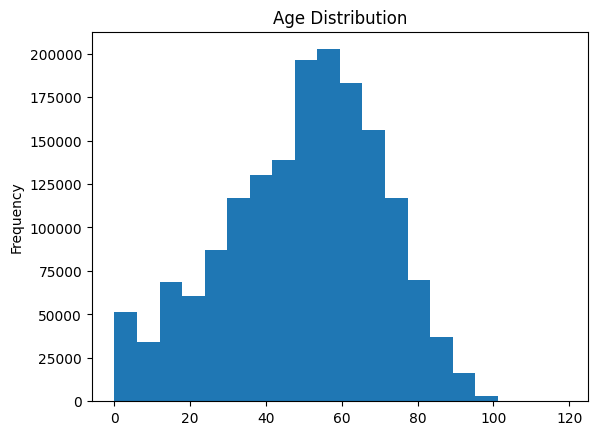

In [ ]:
master_data.AGE_YRS.plot(kind='hist', bins=20, title='Age Distribution')


<Axes: title={'center': 'Recovery Status'}, xlabel='RECOVD'>

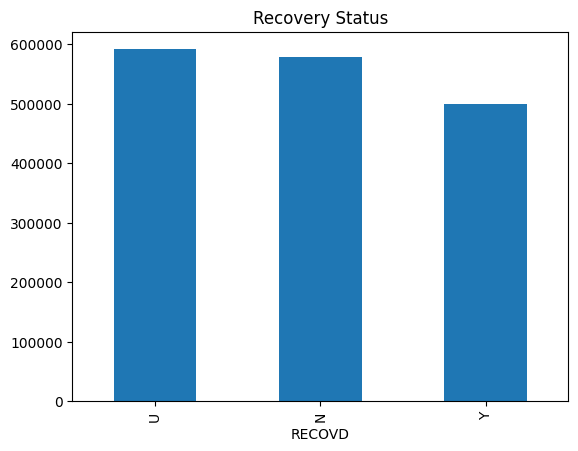

In [ ]:
master_data.RECOVD.value_counts().plot(kind='bar', title='Recovery Status')

In [ ]:
len(master_data.OTHER_MEDS.unique())

353108

In [ ]:
most_other_meds =master_data.OTHER_MEDS.value_counts()
most_other_meds.head(20)

,count
OTHER_MEDS,
None listed,825091
none,41349
unknown,16746
Unknown,13318
NONE,7490
No,6727
None.,4200
UNKNOWN,3997
no,3784


In [ ]:
most_cur_ill =master_data.CUR_ILL.value_counts()
most_cur_ill.head(20)

,count
CUR_ILL,
None Listed,1186747
none,120272
No,28829
NONE,15785
no,14834
unknown,14663
None.,13716
Unknown,11227
N/a,3679


In [ ]:
most_birth_defect = master_data.BIRTH_DEFECT.value_counts()
most_birth_defect

,count
BIRTH_DEFECT,
None Listed,1668084
Y,1359


In [ ]:
most_allergies = master_data.ALLERGIES.value_counts()
most_allergies.head(20)

,count
ALLERGIES,
None Listed,972545
none,67132
NKDA,27161
NKA,26547
No,18012
Penicillin,17735
NONE,9514
No known allergies,9294
no,8926


In [ ]:
most_vax_type = master_data.VAX_TYPE.value_counts()
most_vax_type = most_vax_type.head(5)

<Axes: title={'center': 'Most Common Vaccine Types'}, xlabel='VAX_TYPE'>

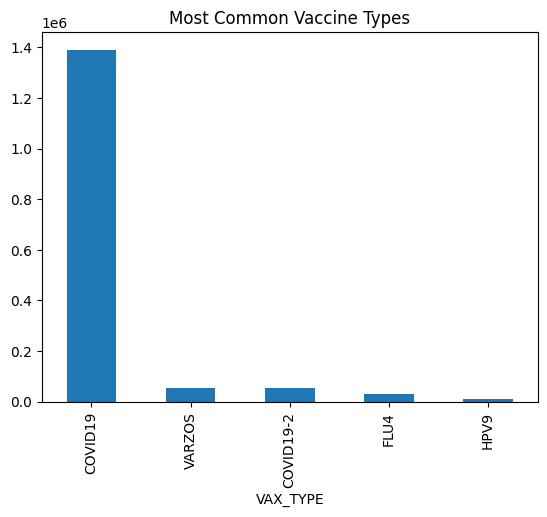

In [ ]:
most_vax_type.plot(kind='bar', title='Most Common Vaccine Types')

In [ ]:
most_vax_manu = master_data.VAX_MANU.value_counts()
most_vax_manu.head(20)

,count
VAX_MANU,
PFIZER\BIONTECH,680162
MODERNA,649775
JANSSEN,105841
GLAXOSMITHKLINE BIOLOGICALS,76981
MERCK & CO. INC.,49615
SANOFI PASTEUR,36799
UNKNOWN MANUFACTURER,28507
"SEQIRUS, INC.",13269
PFIZER\WYETH,11093


<Axes: title={'center': 'Dose Series'}, xlabel='VAX_DOSE_SERIES'>

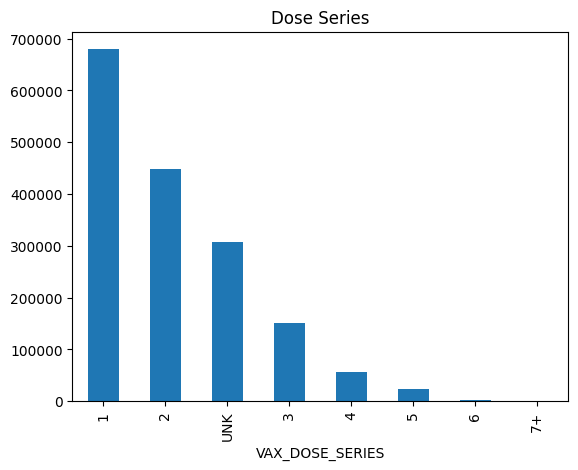

In [ ]:
master_data.VAX_DOSE_SERIES.value_counts().plot(kind='bar', title='Dose Series')

In [ ]:
most_vax_route = master_data.VAX_ROUTE.value_counts()
most_vax_route

,count
VAX_ROUTE,
IM,775334
UN,425834
SYR,264929
OT,185198
SC,13363
PO,2314
ID,1981
JET,262
IN,228
